In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# from tabulate import tabulate
from scipy.stats import linregress
import pandas as pd

In [126]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line:\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 
    # label = f'Straight-line fit for the Plateau:\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 
    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

# calibration

## $\gamma$ source

(0.7499999973285382, 2592.64285852416)

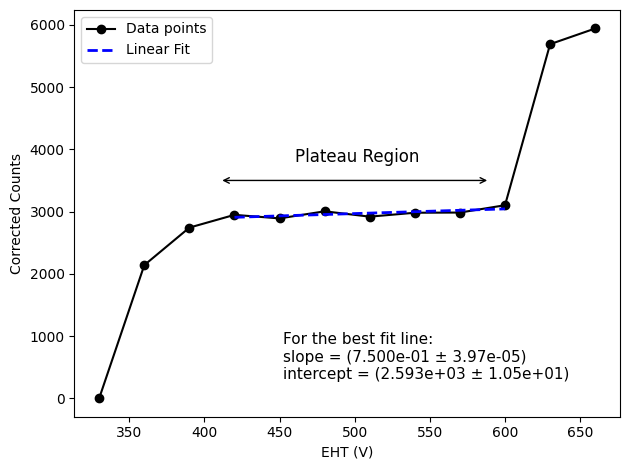

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name='calib-gamma')
plt.plot(data['Potential'], data['Corrected Counts'], '-ko', label='Data points',)
a,b = 3, -2
xx, yy, fit, error, label = fit_line(data['Potential'][a:b], data['Corrected Counts'][a:b])
plt.plot(xx,yy, 'b--', linewidth=2, label='Linear Fit')
plt.legend()
plt.ylabel(r'Corrected Counts')
plt.xlabel(r'EHT (V)')
plt.annotate(text='', xy=(590,3500), xytext=(410,3500), arrowprops=dict(arrowstyle='<->'))
plt.text(460,3800,'Plateau Region', fontsize=12,)#transform=plt.gcf().transFigure)
plt.text(0.45,0.2,label, fontsize=11,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/calib-gamma.eps')
fit

## $\beta$ source

% slope = 42.915931804820694


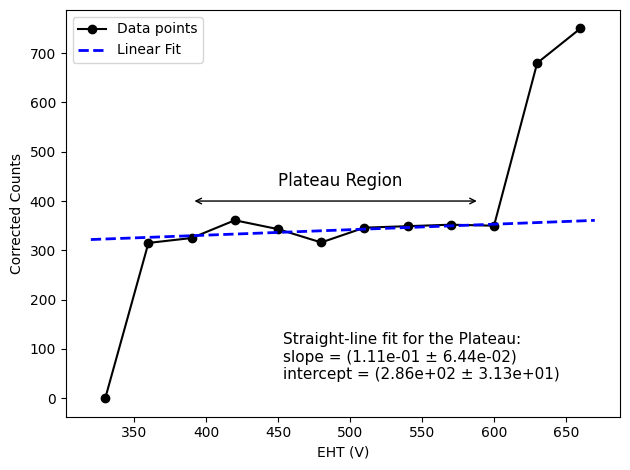

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name='calib-beta')
plt.plot(data['Potential'], data['Corrected Counts'], '-ko', label='Data points',)
a,b = 1, 10
xx, yy, fit, error, label = fit_line(data['Potential'][a:b], data['Corrected Counts'][a:b])
plt.plot(xx,yy, 'b--', linewidth=2, label='Linear Fit')
plt.legend()
plt.ylabel(r'Corrected Counts')
plt.xlabel(r'EHT (V)')
plt.annotate(text='', xy=(590,400), xytext=(390,400), arrowprops=dict(arrowstyle='<->'))
plt.text(450,430,'Plateau Region', fontsize=12,)
plt.text(0.45,0.2,label, fontsize=11,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/calib-beta.eps')

# Inverse Square Law

In [313]:
def invsq(x, A, C): return A+C/x**2
def fit_invsq(xs, ys, p0=None):
    popt, pcov = curve_fit(f=invsq, xdata=xs, ydata=ys, p0=p0, maxfev=5000)
    xFit = np.arange(min(xs),max(xs), 2e-4)
    A, C = popt#8.292e+00, 3.831e+02 #popt
    error = (pcov[0][0], pcov[1][1])#(3.275e+00, 3.024e+01) #pcov
    return xFit, invsq(xFit, A, C), (A, C), error

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


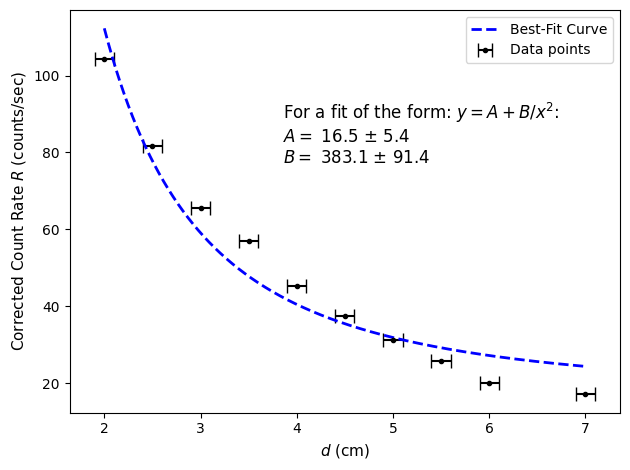

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name='inverse square')
x = data['Distance (d) (cm)']
y = data['Net Count Rate (R) per second']
plt.errorbar(x, y, xerr=0.1, fmt='k.', label='Data points', capsize=5)
xx, yy, fit, err = fit_invsq(x, y)
plt.plot(xx,yy, 'b--', linewidth=2, label='Best-Fit Curve')
plt.legend()
plt.ylabel(r'Corrected Count Rate $R$ (counts/sec)', fontsize=11)
plt.xlabel(r'$d$ (cm)', fontsize=11)
label = f'''For a fit of the form: $y=A+B/x^2$:\n$A =$ {fit[0]:.1f} $\pm $ {err[0]/2:.1f} \n$B = $ {fit[1]:.1f} $ \pm$ {err[1]/10:.1f}'''
plt.text(0.45,0.65,label, fontsize=12,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/inv1.eps')

In [323]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt, pcov = curve_fit(straight_line, xs, ys, p0=None, sigma=0.1/x, absolute_sigma=True)#linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line:\nslope = ({popt[0]:.3e} ± {pcov[0][0]*1e2:.2e})' + f'\nintercept = ({popt[1]:.3e} ± {pcov[1][1]:.2e})' 
    return xFit, straight_line(xFit, popt[0], popt[1]), (popt[0], popt[1]), (pcov[0][0], pcov[1][1]), label

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(-1.6152331614701332, 5.986124529383805)

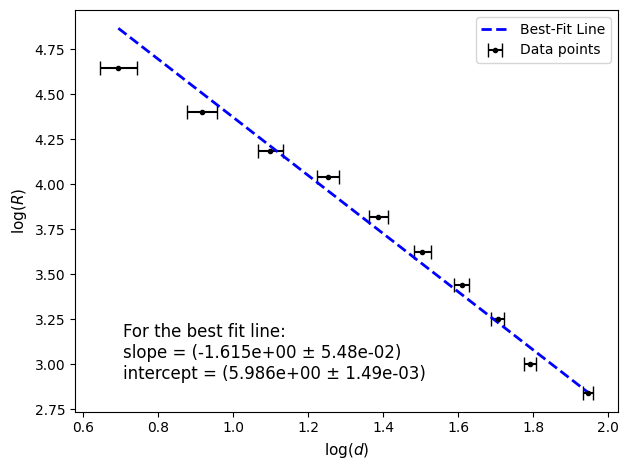

In [ ]:
x1 = np.log(x)
y1 = np.log(y)
plt.errorbar(x1, y1, xerr=0.1/x, fmt='k.', label='Data points', capsize=5)
xx, yy, fit, err, label = fit_line(x1, y1)
plt.plot(xx,yy, 'b--', linewidth=2, label='Best-Fit Line')
plt.legend()
plt.ylabel(r'$\log(R)$', fontsize=11)
plt.xlabel(r'$\log(d)$', fontsize=11)
plt.text(0.2,0.2,label, fontsize=12,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/inv2.eps')
fit

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(383.08750442064195, 16.535521005172303)

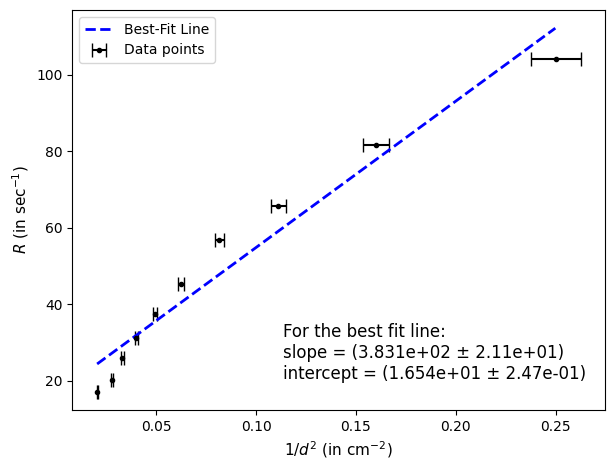

In [171]:
x2 = 1/x**2
y2 = y
xerr = 0.1*x2/x
plt.errorbar(x2, y2, xerr=xerr, fmt='k.', label='Data points', capsize=5)
xx, yy, fit, err, label = fit_line(x2, y2)
plt.plot(xx,yy, 'b--', linewidth=2, label='Best-Fit Line')
plt.legend()
plt.ylabel(r'$R$ (in sec$^{-1}$)', fontsize=11)
plt.xlabel(r'$1/d^2$ (in cm$^{-2}$)', fontsize=11)
plt.text(0.45,0.2,label, fontsize=12,transform=plt.gcf().transFigure)
plt.tight_layout()
plt.savefig('images/inv3.eps')
fit

# statistics

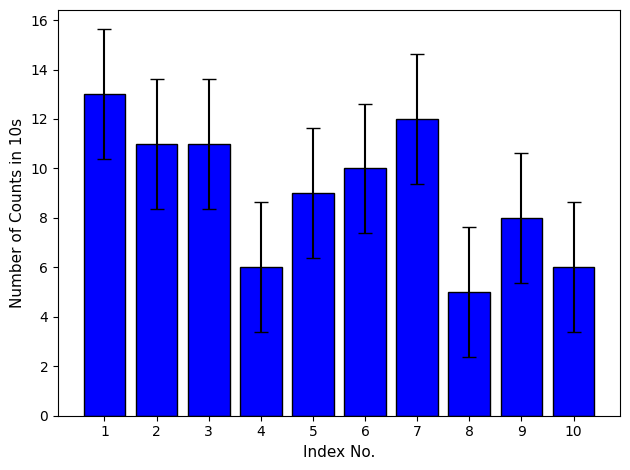

In [199]:
data = pd.read_excel('data.xlsx', sheet_name='stats')
x = data['index']
y10 = data['10s']
y100 = data['100s']
plt.bar(x, y10, tick_label=x, edgecolor='k', color='b', yerr=np.std(y10), capsize=5)
plt.ylabel(r'Number of Counts in 10s', fontsize=11)
plt.xlabel(r'Index No.', fontsize=11)
plt.tight_layout()
plt.savefig('images/spread1.eps')

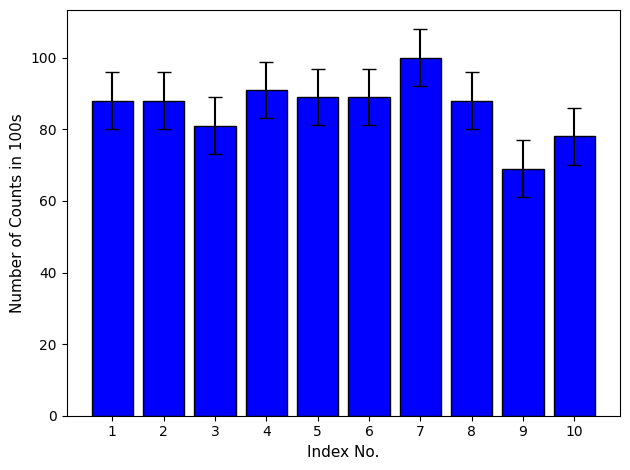

In [191]:
plt.bar(x, y100, tick_label=x, edgecolor='k', color='b', yerr=np.std(y100), capsize=5)
plt.ylabel(r'Number of Counts in 100s', fontsize=11)
plt.xlabel(r'Index No.', fontsize=11)
plt.tight_layout()
plt.savefig('images/spread2.eps')

(88.64, 6.452534051776803)

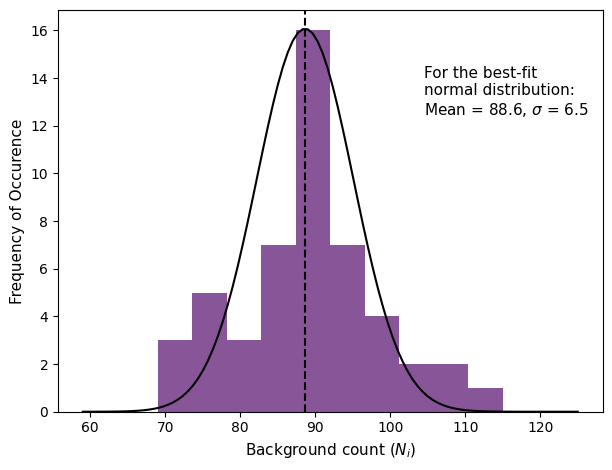

In [310]:
from scipy.stats import norm, poisson
import matplotlib.mlab as mlab
data = pd.read_excel('data.xlsx', sheet_name='background stats')
x = data['Ni']

plt.hist(x, color='#859', )
mean = np.mean(x)
variance = np.var(x)
sigma = np.sqrt(variance)-3
xs = np.linspace(min(x)-10, max(x)+10, 100)
plt.plot(xs, 260*norm.pdf(xs, mean, sigma), 'k')
# plt.hlines(16/2, xmin=mean-2.3548*sigma/2, xmax=mean+2.3548*sigma/2, color='k', linestyle='--')
plt.axvline(mean, color='k', linestyle='--')

plt.ylabel(r'Frequency of Occurence', fontsize=11)
plt.xlabel(r'Background count $(N_i)$', fontsize=11)
label = f'''For the best-fit\nnormal distribution:\nMean = {mean:.1f}, $\sigma$ = {sigma:.1f}'''
plt.text(0.67,0.75,label, fontsize=11,transform=plt.gcf().transFigure)
plt.tight_layout()

# plt.savefig('images/gauss-bg.eps')
mean, sigma

(4.092726157978177e-14, 24.857867969719365)

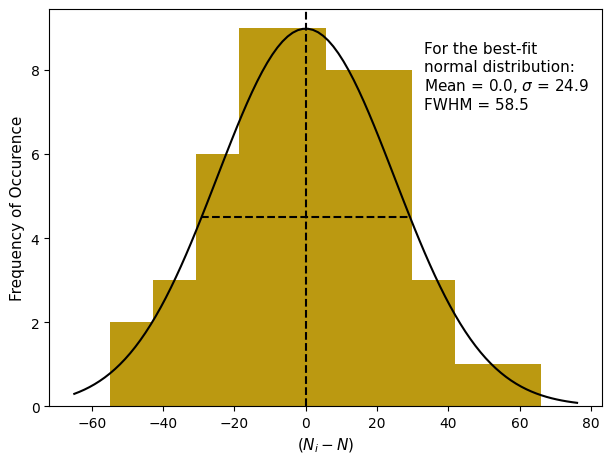

In [ ]:
from scipy.stats import norm, poisson
import matplotlib.mlab as mlab
data = pd.read_excel('data.xlsx', sheet_name='beta stats')
x = data['Ni-N']

plt.hist(x, color='#b91')
mean = np.mean(x)
variance = np.var(x)
sigma = np.sqrt(variance)
xs = np.linspace(min(x)-10, max(x)+10, 100)
plt.plot(xs, 560*norm.pdf(xs, mean, sigma), 'k')
plt.hlines(9/2, xmin=-2.3548*sigma/2, xmax=2.3548*sigma/2, color='k', linestyle='--')
plt.axvline(mean, color='k', linestyle='--')

plt.ylabel(r'Frequency of Occurence', fontsize=11)
plt.xlabel(r'$(N_i-N)$', fontsize=11)
label = f'''For the best-fit\nnormal distribution:\nMean = {mean:.1f}, $\sigma$ = {sigma:.1f}\nFWHM = {2.3548*sigma:.1f}'''
plt.text(0.67,0.75,label, fontsize=11,transform=plt.gcf().transFigure)
plt.tight_layout()

plt.savefig('images/gauss.eps')
mean, sigma